# Getting started

We begin with a straightforward example: decomposing the temperature over North America using tutorial data provided by ``xarray``.

In [3]:
import xarray as xr
import xeofs as xe


t2m = xr.tutorial.open_dataset('air_temperature')
t2m

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Our first step is to use standard EOF analysis in S-mode, as this is the most commonly employed variant of EOF analysis. If you're unfamiliar with the distinction between S-mode and T-mode, the article by[Compagnucci & Richmann (2007)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.1574) provides an excecllent summary.

To conduct EOF analysis, we first establish an `EOF` instance by determining the model parameters. For this example, we are interested in the first 15 modes using a non-standardized EOF analysis (based on the covariance matrix) without any weighting. Subsequently, we fit the data, specifying the sample dimensions.

In [4]:
model = xe.models.EOF(n_modes=10)
model.fit(t2m, dim='time')

After completing these steps, we can examine the fraction of variance explained by each mode:

In [5]:
model.explained_variance_ratio()

<xarray.DataArray 'explained_variance_ratio' (mode: 10)>
array([0.79683536, 0.02702064, 0.02226541, 0.01632091, 0.01500375,
       0.01136572, 0.01082396, 0.00727871, 0.00685   , 0.00615871],
      dtype=float32)
Coordinates:
  * mode     (mode) int64 1 2 3 4 5 6 7 8 9 10
Attributes:
    model:        EOF analysis
    n_modes:      10
    standardize:  False
    use_coslat:   False
    use_weights:  False
    software:     xeofs
    version:      0.7.2
    date:         2023-07-07 02:06:52

Now, let's turn our attention to the components, often referred to as EOFs.

In [6]:
components = model.components()
components

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, mode: 10)
Coordinates:
  * lat      (lat) float32 15.0 17.5 20.0 22.5 25.0 ... 65.0 67.5 70.0 72.5 75.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * mode     (mode) int64 1 2 3 4 5 6 7 8 9 10
Data variables:
    air      (mode, lat, lon) float32 0.0022 0.002131 ... -0.05068 -0.04929

It's important to note that since we utilized `xr.Dataset` as our data input, the components will also be represented as an `xr.Dataset`.

To better understand them, we can visualize these components using the built-in plot method of `xarray`:

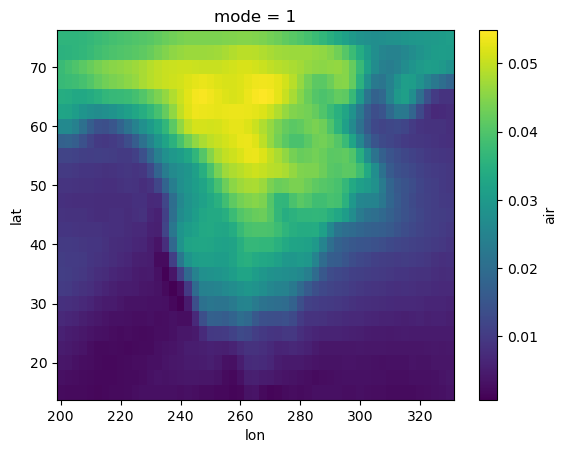

In [7]:
components['air'].sel(mode=1).plot()

In a similar fashion, we can also retrieve and examine the scores, typically referred to as Principal Components (PCs).

In [8]:
scores = model.scores()
scores

<xarray.DataArray 'scores' (mode: 10, time: 2920)>
array([[-0.02050841, -0.02211719, -0.02267276, ..., -0.02365231,
        -0.02343557, -0.02277728],
       [ 0.00977562,  0.01718286,  0.02080854, ...,  0.05042389,
         0.04311329,  0.02926528],
       [-0.00554162, -0.00289666, -0.00417395, ..., -0.02463179,
        -0.02405178, -0.02322624],
       ...,
       [-0.02423722, -0.0170266 , -0.00488411, ...,  0.02096048,
         0.04138021,  0.04657885],
       [ 0.00758892, -0.00331682, -0.00332489, ..., -0.00370636,
         0.0022518 , -0.00118891],
       [ 0.04452861,  0.03940859,  0.02750784, ...,  0.0217004 ,
         0.02595484,  0.03019614]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * mode     (mode) int64 1 2 3 4 5 6 7 8 9 10
Attributes:
    model:        EOF analysis
    n_modes:      10
    standardize:  False
    use_coslat:   False
    use_weights:  False
    software:     xeofs
    version:      0.7.2
    date:         2023-07-07 02:06:52

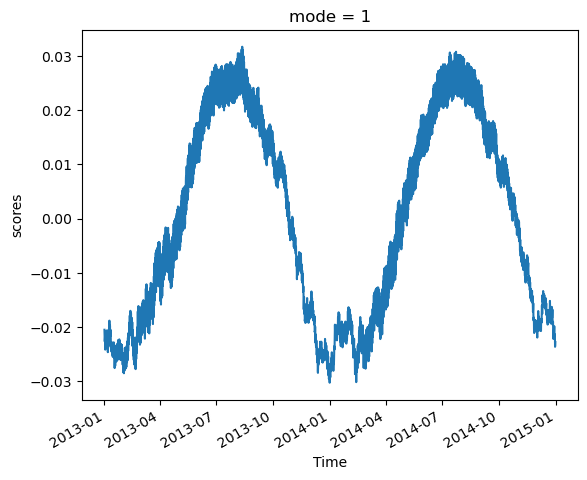

In [9]:
scores.sel(mode=1).plot()